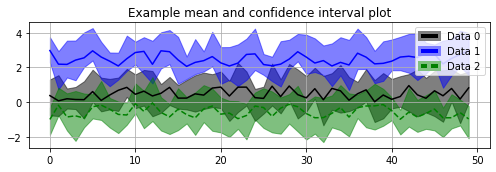

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import colorConverter as cc
import numpy as np
 
def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
    # plot the shaded range of the confidence intervals
    plt.fill_between(range(mean.shape[0]), ub, lb,
                     color=color_shading, alpha=.5)
    # plot the mean on top
    plt.plot(mean, color_mean)
 
# generate 3 sets of random means and confidence intervals to plot
mean0 = np.random.random(50)
ub0 = mean0 + np.random.random(50) + .5
lb0 = mean0 - np.random.random(50) - .5
 
mean1 = np.random.random(50) + 2
ub1 = mean1 + np.random.random(50) + .5
lb1 = mean1 - np.random.random(50) - .5
 
mean2 = np.random.random(50) -1
ub2 = mean2 + np.random.random(50) + .5
lb2 = mean2 - np.random.random(50) - .5
 
# plot the data
fig = plt.figure(1, figsize=(7, 2.5))
plot_mean_and_CI(mean0, ub0, lb0, color_mean='k', color_shading='k')
plot_mean_and_CI(mean1, ub1, lb1, color_mean='b', color_shading='b')
plot_mean_and_CI(mean2, ub2, lb2, color_mean='g--', color_shading='g')
 
class LegendObject(object):
    def __init__(self, facecolor='red', edgecolor='white', dashed=False):
        self.facecolor = facecolor
        self.edgecolor = edgecolor
        self.dashed = dashed
 
    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        width, height = handlebox.width, handlebox.height
        patch = mpatches.Rectangle(
            # create a rectangle that is filled with color
            [x0, y0], width, height, facecolor=self.facecolor,
            # and whose edges are the faded color
            edgecolor=self.edgecolor, lw=3)
        handlebox.add_artist(patch)
 
        # if we're creating the legend for a dashed line,
        # manually add the dash in to our rectangle
        if self.dashed:
            patch1 = mpatches.Rectangle(
                [x0 + 2*width/5, y0], width/5, height, facecolor=self.edgecolor,
                transform=handlebox.get_transform())
            handlebox.add_artist(patch1)
 
        return patch
 
bg = np.array([1, 1, 1])  # background of the legend is white
colors = ['black', 'blue', 'green']
# with alpha = .5, the faded color is the average of the background and color
colors_faded = [(np.array(cc.to_rgb(color)) + bg) / 2.0 for color in colors]
 
plt.legend([0, 1, 2], ['Data 0', 'Data 1', 'Data 2'],
           handler_map={
               0: LegendObject(colors[0], colors_faded[0]),
               1: LegendObject(colors[1], colors_faded[1]),
               2: LegendObject(colors[2], colors_faded[2], dashed=True),
            })
 
plt.title('Example mean and confidence interval plot')
plt.tight_layout()
plt.grid()
plt.show()

In [2]:
mean0

array([0.37747772, 0.07693753, 0.1940634 , 0.15176569, 0.14293999,
       0.60894227, 0.09985447, 0.41118113, 0.68274936, 0.85285374,
       0.4541564 , 0.63333913, 0.35620657, 0.51059929, 0.85266049,
       0.23237531, 0.23283028, 0.47911222, 0.40544178, 0.81126309,
       0.86811543, 0.35334637, 0.86403165, 0.86593378, 0.25916208,
       0.21492518, 0.92107401, 0.32022366, 0.93038498, 0.4327189 ,
       0.24912534, 0.77540019, 0.13939365, 0.79231252, 0.65351859,
       0.11080199, 0.48425663, 0.7100898 , 0.02117045, 0.41127722,
       0.16392522, 0.32550661, 0.95452695, 0.42164106, 0.22468096,
       0.65491521, 0.36794668, 0.78792547, 0.17727132, 0.82141194])